# **IGTI - MPT**

- Classificação
- [Prof. Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

In [ ]:
# importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

from matplotlib.colors import ListedColormap
import matplotlib

## **Leitura dos dados**

Neste exercício iremos realizar a predição se uma pessoa irá comprar ou não um produto anunciado em redes sociais. O dataset para esse problema é carregado a seguir.

In [ ]:
# importando o dataset
dataset = pd.read_csv('https://pycourse.s3.amazonaws.com/Social_Network_Ads.csv')
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
# info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Não é necessário um tratamento de dados faltantes pois o dataset está completo. Entretanto, escalar as variáveis númericas **Age, EstimatedSalary** é necessário.

Inicialmente, para visualização 2D, somente **Age, EstimatedSalary** serão usadas como variáveis exógenas.

In [ ]:
# extraindo as matrizes X e y
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [ ]:
# verificação
print('X = \n')
print(X[:5, :])
print('y = \n')
print(y[:5])

X = 

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
y = 

[0 0 0 0 0]


A seguir, é realizada a divisão em treinamento/teste e a normalização das variáveis.

In [ ]:
# divisão em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 0,
                                                    stratify = y)

In [ ]:
# escalando as variáveis
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float64))
X_test = sc.transform(X_test.astype(np.float64))

In [ ]:
# visualização da superfície de decisão
def plot_decision_boundary(X_set,
                           y_set,
                           classifier,
                           xlabel='',
                           ylabel='',
                           title=''):
  # visualizando a superfície de separação da predição
  plt.figure(figsize=(8,8))
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
  plt.contourf(X1, X2,
               classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.2, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.plot(X_set[y_set == j, 0], X_set[y_set == j, 1],'o',
                  c=ListedColormap(('red', 'green'))(i),label=j)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

## **Regressão Logística**

In [ ]:
# fit no modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predição no dataset de test
y_pred = log_reg.predict(X_test)

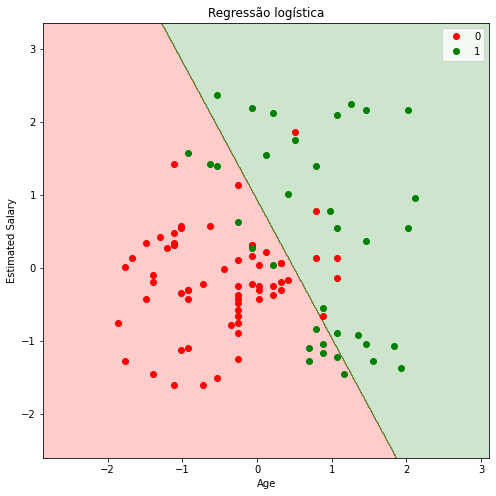

In [ ]:
# visualização
plot_decision_boundary(X_set=X_test,
                       y_set=y_test,
                       classifier=log_reg,
                       xlabel='Age',
                       ylabel='Estimated Salary',
                       title='Regressão logística')

## **KNN**

In [ ]:
# fit no modelo
n = 10
knn_reg = KNeighborsClassifier(n_neighbors=n)
knn_reg.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# predição no dataset de test
y_pred = knn_reg.predict(X_test)

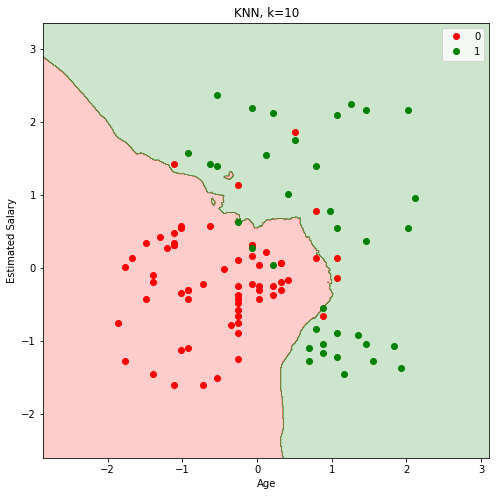

In [ ]:
# visualização
plot_decision_boundary(X_set=X_test,
                       y_set=y_test,
                       classifier=knn_reg,
                       xlabel='Age',
                       ylabel='Estimated Salary',
                       title=f'KNN, k={n}')

## **Avaliando a qualidade de um modelo de classificação**

In [ ]:
# report de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.82      0.92      0.87        36

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100



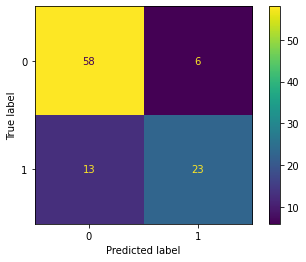

In [ ]:
# matriz de confusão Regressão Logística
plot_confusion_matrix(log_reg, X_test, y_test);

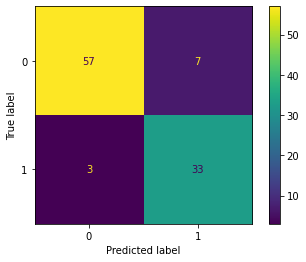

In [ ]:
# matriz de confusão KNN
plot_confusion_matrix(knn_reg, X_test, y_test);

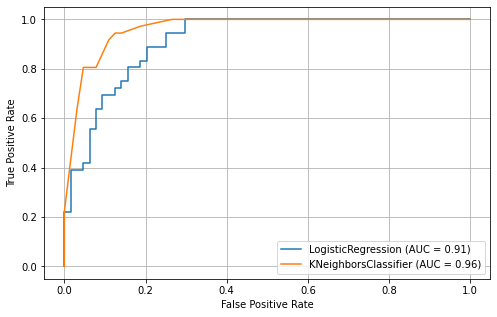

In [ ]:
# curva ROC 
fig, ax = plt.subplots(figsize=(8, 5))
plot_roc_curve(log_reg, X_test, y_test, ax=ax)
plot_roc_curve(knn_reg, X_test, y_test, ax=ax)
ax.grid()
plt.show()

## **Classificação em problemas não lineares**

In [ ]:
# nome dos modelos de classificação
names = ["Logistic Regression",
         "Nearest Neighbors",
         "Random Forest",
         "Neural Net"]

classifiers = [LogisticRegression(),
               KNeighborsClassifier(n_neighbors=3),
               RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               MLPClassifier(alpha=1, max_iter=1000)]

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification

# datasets sintéticos
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

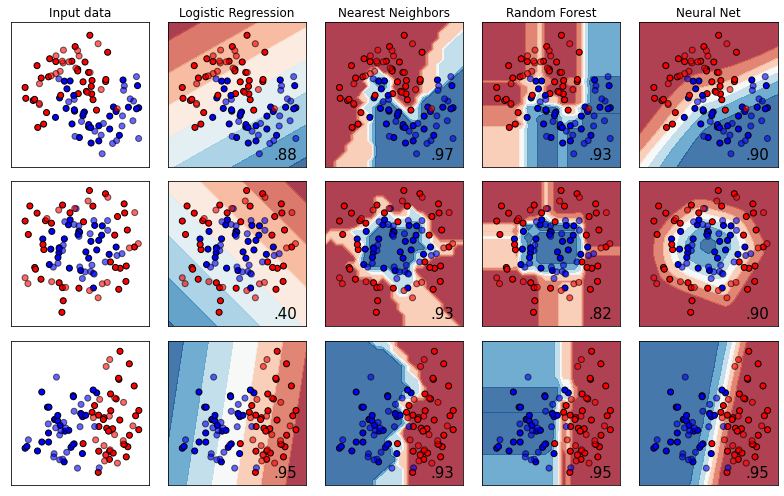

In [ ]:
# comparativo: adaptado de 
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# iterate over datasets
figure = plt.figure(figsize=(11, 7))
h = 0.2
i = 1
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()